In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_exports_load = "exports_conversion.csv"
data_imports_load= "imports_conversion.csv"


In [3]:
data_exports = pd.read_csv(data_exports_load)
data_imports = pd.read_csv(data_imports_load)
data_exports

,Unnamed: 0,COMMODITY_DESC,GEOGRAPHY_DESC,UNIT_DESC,YEAR_ID,AMOUNT,Metric Tons
0,19094,Chicken,Afghanistan,KG,2006,9.862200e+05,986.220000
1,19095,Chicken,Afghanistan,KG,2006,9.810000e+04,98.100000
2,19096,Chicken,Afghanistan,KG,2006,5.490000e+04,54.900000
3,19097,Chicken,Afghanistan,KG,2006,7.537550e+05,753.755000
4,19242,Chicken,Afghanistan,CWE,2006,3.770924e+06,171049.128969
...,...,...,...,...,...,...,...
528013,975181,Chicken,Zimbabwe,KG,2012,2.444340e+05,244.434000
528014,128517,Beef,Zimbabwe,CWE,2013,8.240015e+04,3737.670772
528015,399936,Beef,Zimbabwe,KG,2013,2.630300e+04,26.303000
528016,565085,Beef,Zimbabwe,KG,2013,2.630300e+04,26.303000


In [4]:
commodity=data_exports.COMMODITY_DESC.unique()
commodity

array(['Chicken', 'Pork', 'Beef', 'Turkey', 'Sheep', 'Goat'], dtype=object)

In [5]:
imports=data_imports.COMMODITY_DESC.unique()
imports

array(['Beef', 'Sheep',
       'Animal livers except goose, prepared or preserved', 'Pork',
       'Chicken', 'Goat',
       'Shoulders and cuts, boned, cooked, airtight container 1 kg or more',
       'Bison with bone in, fresh or chilled', 'Turkey',
       'Bison meat, fresh or chilled, boneless',
       'Shoulders and cuts, bone in, salted, in brine, dried or smoked',
       'Shoulders and cuts thereof nesoi, prepared or preserved',
       'Shoulders and cuts, boned, cooked, airtight container less than 1 kg',
       'Cows, live, imported for dairy purposes, weigh 90 kg or more',
       'Cows, live, imported for dairy purposes, weighing less than 90 kg',
       'Cows, live, imported specially for dairy puposes, weighing  90 kg  or more each,',
       'Cows, live, imported specially for dairy puposes, weighing less than 90 kg each,'],
      dtype=object)

In [6]:
data_imports.loc[data_imports['COMMODITY_DESC'].str.contains('cow', case=False),'COMMODITY_DESC']='Beef'
data_imports.loc[data_imports['COMMODITY_DESC'].str.contains('shoulder', case=False),'COMMODITY_DESC']='Beef'
data_imports.loc[data_imports['COMMODITY_DESC'].str.contains('bison', case=False),'COMMODITY_DESC']='Beef'
data_imports.loc[data_imports['COMMODITY_DESC'].str.contains('liver', case=False),'COMMODITY_DESC']='Chicken'

In [7]:
imports=data_imports.COMMODITY_DESC.unique()
imports


array(['Beef', 'Sheep', 'Chicken', 'Pork', 'Goat', 'Turkey'], dtype=object)

In [8]:
table_new_imports = data_imports.loc[:,['YEAR_ID','Metric Tons']]
table_new_imports

,YEAR_ID,Metric Tons
0,2006,137.101000
1,2006,87.009000
2,2006,9.386000
3,2006,19.475000
4,2006,122.693000
...,...,...
96704,2016,22546.772899
96705,2016,28264.267461
96706,2016,18668.108750
96707,2016,28945.478727


In [9]:
years_data=table_new_imports.groupby(["YEAR_ID"]).sum()
years_data

,Metric Tons
YEAR_ID,
2006,8.388916e+08
2007,8.411989e+08
2008,7.182489e+08
2009,7.216136e+08
2010,6.648807e+08
2011,6.081964e+08
2012,6.373839e+08
2013,6.582723e+08
2014,8.160736e+08


In [10]:
table_new_exports = data_exports.loc[:,['YEAR_ID','Metric Tons']]
table_new_exports

,YEAR_ID,Metric Tons
0,2006,986.220000
1,2006,98.100000
2,2006,54.900000
3,2006,753.755000
4,2006,171049.128969
...,...,...
528013,2012,244.434000
528014,2013,3737.670772
528015,2013,26.303000
528016,2013,26.303000


In [11]:
years_data_2=table_new_exports.groupby(["YEAR_ID"]).sum()
years_data_2

,Metric Tons
YEAR_ID,
2006,1.833618e+09
2007,2.037404e+09
2008,2.631688e+09
2009,2.454298e+09
2010,2.536776e+09
2011,2.867232e+09
2012,2.910035e+09
2013,2.868072e+09
2014,2.884786e+09


<function matplotlib.pyplot.show(*args, **kw)>

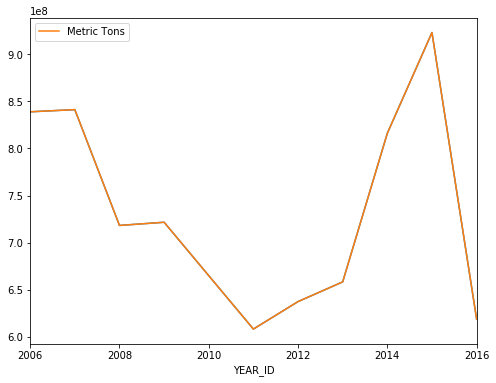

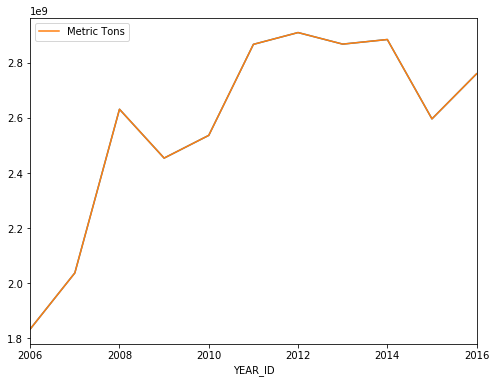

In [12]:
ax = years_data.plot(figsize=(8,6), legend = False)
#ax.set_prop_cycle(None)
years_data.plot(figsize=(8,6), markersize=14, ax = ax)
ax = years_data_2.plot(figsize=(8,6), legend = False)
#ax.set_prop_cycle(None)
years_data_2.plot(figsize=(8,6), markersize=14, ax = ax)

#ax = years_data.plot(figsize=(12,8), y=years_data_2, legend = False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

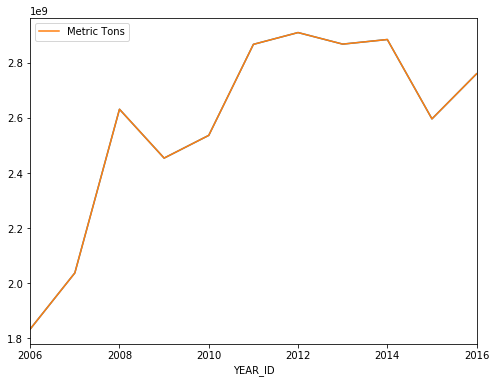

In [13]:
ax = years_data_2.plot(figsize=(8,6), legend = False)
#ax.set_prop_cycle(None)
years_data_2.plot(figsize=(8,6), markersize=14, ax = ax)

#ax = years_data.plot(figsize=(12,8), y=years_data_2, legend = False)
plt.show

In [12]:
merged_data=years_data.merge(years_data_2, on = "YEAR_ID")
merged_data=merged_data.rename(columns={"Metric Tons_x": "Imports","Metric Tons_y":"Exports"})

merged_data

,Imports,Exports
YEAR_ID,,
2006,8.388916e+08,1.833618e+09
2007,8.411989e+08,2.037404e+09
2008,7.182489e+08,2.631688e+09
2009,7.216136e+08,2.454298e+09
2010,6.648807e+08,2.536776e+09
2011,6.081964e+08,2.867232e+09
2012,6.373839e+08,2.910035e+09
2013,6.582723e+08,2.868072e+09
2014,8.160736e+08,2.884786e+09


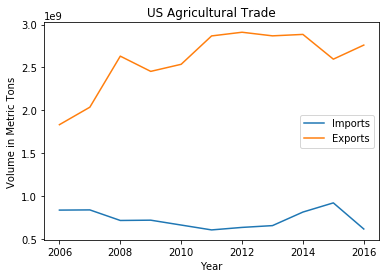

In [13]:
plt.plot(merged_data.index, merged_data['Imports'], label="Imports")
plt.plot(merged_data.index, merged_data['Exports'], label="Exports")


plt.title("US Agricultural Trade")
plt.xlabel("Year")
plt.ylabel("Volume in Metric Tons")
plt.legend()
plt.savefig("Aggregate_Trade.png")
plt.show()

In [14]:
pct_chg = merged_data.pct_change()
pct_chg

,Imports,Exports
YEAR_ID,,
2006,NaN,NaN
2007,0.002750,0.111139
2008,-0.146160,0.291687
2009,0.004685,-0.067406
2010,-0.078619,0.033606
2011,-0.085255,0.130266
2012,0.047990,0.014928
2013,0.032772,-0.014420
2014,0.239720,0.005828


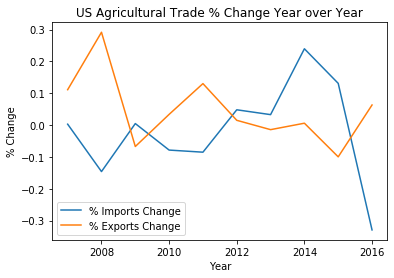

In [15]:
plt.plot(pct_chg.index, pct_chg['Imports'], label="% Imports Change")
plt.plot(pct_chg.index, pct_chg['Exports'], label="% Exports Change")


plt.title("US Agricultural Trade % Change Year over Year")
plt.xlabel("Year")
plt.ylabel("% Change")
plt.savefig("Percent_Change.png")
plt.legend()
plt.show()